# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [1]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
100% 235k/235k [00:00<00:00, 779kB/s]
100% 235k/235k [00:00<00:00, 778kB/s]
Archive:  traffic-dataset.zip
  inflating: Traffic Data.csv        


In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('/content/Traffic Data.csv' , parse_dates=['date_time'] , index_col = ['date_time'])
df.head()


,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [147]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear


In [98]:
df.tail()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2018-06-06 21:00:00,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds
2017-10-25 15:00:00,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds
2018-03-28 23:00:00,1132.0,275.30,0.0,0.0,1,Clear,sky is clear
2018-02-12 15:00:00,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds
2018-05-31 18:00:00,5042.0,301.65,0.0,0.0,40,Clouds,scattered clouds


In [99]:
df.sample(6)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-04-14 05:00:00,2425.0,281.65,0.00,0.0,90,Clouds,overcast clouds
2017-10-07 08:00:00,3039.0,285.15,0.00,0.0,90,Rain,moderate rain
2017-12-29 07:00:00,4148.0,254.07,0.00,0.0,90,Clouds,overcast clouds
2017-09-01 06:00:00,5248.0,284.61,0.00,0.0,1,Mist,mist
2018-08-24 05:00:00,2950.0,292.67,0.51,0.0,90,Thunderstorm,proximity thunderstorm with drizzle
2017-06-05 21:00:00,2847.0,297.29,0.00,0.0,1,Clear,sky is clear


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2017-08-27 01:00:00 to 2018-05-31 18:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


In [101]:
df.shape

(20000, 7)

<Axes: xlabel='date_time'>

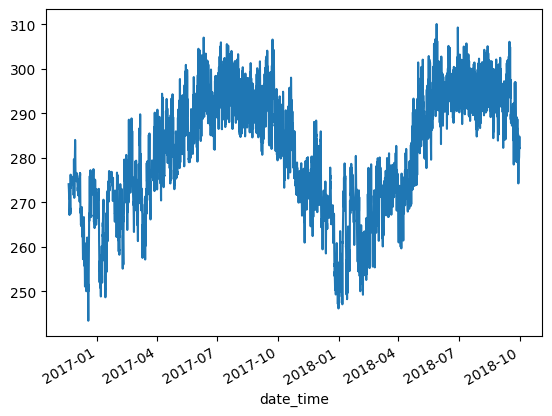

In [102]:
df['temp'].plot()

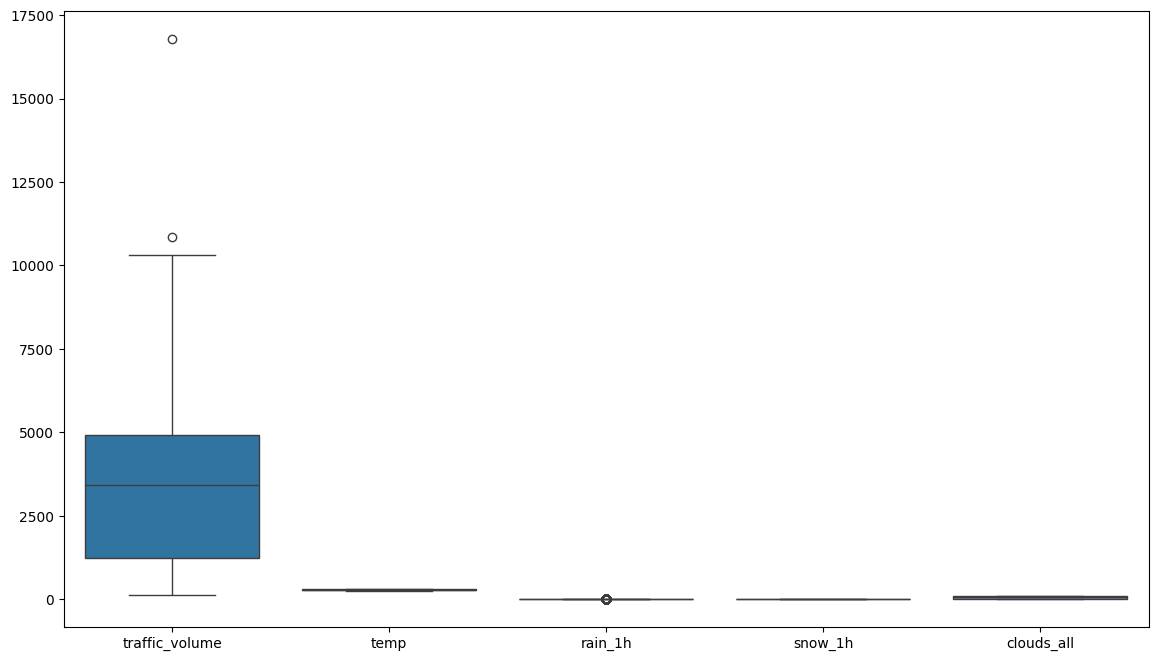

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
sns.boxplot(df)
plt.show()

#notice that there are outliers with traffic situation

In [104]:
#use IQR to remove outliers
Q1 = df['traffic_volume'].quantile(0.25)
Q3 = df['traffic_volume'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['traffic_volume'] >= lower_bound) & (df['traffic_volume'] <= upper_bound)]

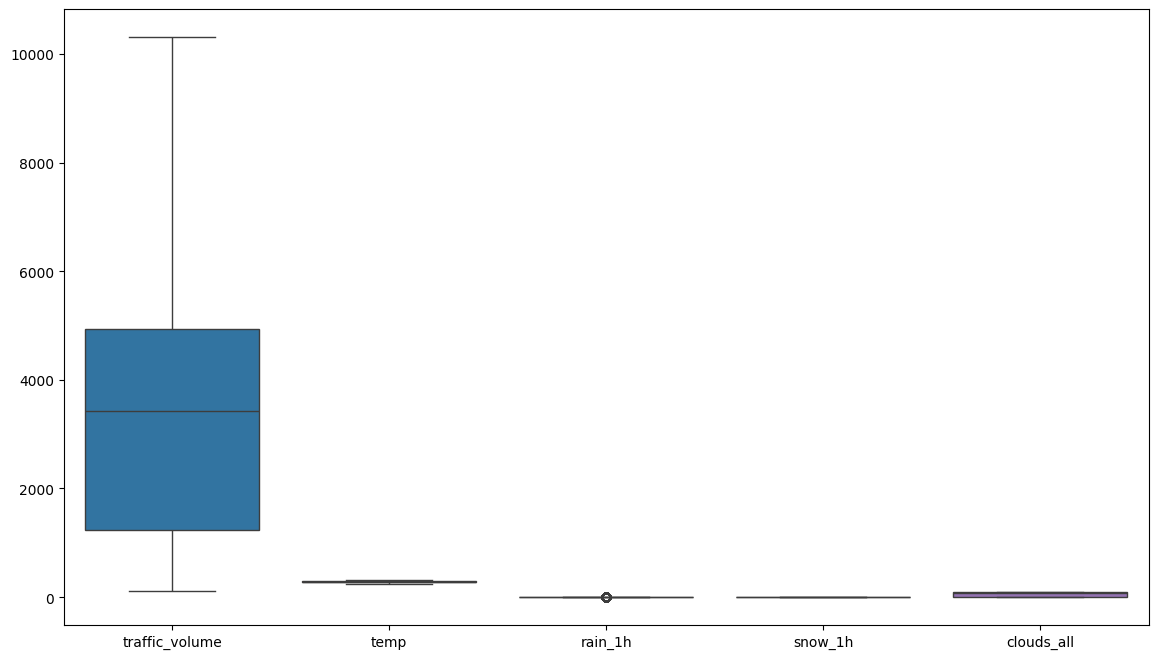

In [105]:
plt.figure(figsize=(14,8))
sns.boxplot(df)
plt.show()

In [148]:
df.sort_index(inplace=True)

In [150]:
df['traffic_volume'].fillna(df['traffic_volume'].rolling(window=6,min_periods=1).mean(),inplace= True)
# i should put it down bur cause the seasonal decompose does not work with null so i will delete my code down thier and put it here

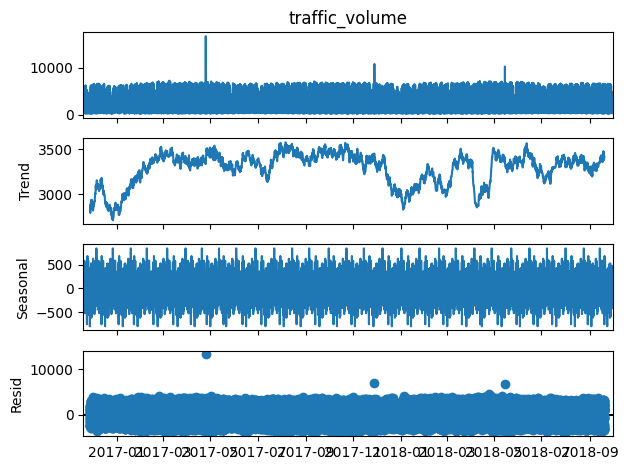

In [151]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['traffic_volume'], model='additive', period=672)
result.plot()
plt.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [152]:
df.isnull().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [153]:
df.duplicated().sum()

18

In [154]:
df = df.drop_duplicates()


In [155]:
df.duplicated().sum()

0

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [156]:
df['prev_traffic_volume'] = df['traffic_volume'].shift(1)
df['prev_traffic_volume'].fillna(method='bfill', inplace=True)
df.head()

<ipython-input-156-07b5c83f8241>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['prev_traffic_volume'].fillna(method='bfill', inplace=True)


,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,prev_traffic_volume
date_time,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,4872.0
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog,4872.0
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist,4872.0
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog,4872.0
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist,5074.0


In [157]:
df['difference traffic vloume'] = df['traffic_volume'].diff()

In [158]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,prev_traffic_volume,difference traffic vloume
date_time,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,4872.0,NaN
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog,4872.0,0.0
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist,4872.0,0.0
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog,4872.0,202.0
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist,5074.0,0.0


In [159]:
df['difference traffic vloume'].fillna(0, inplace=True)
#again remove the first NaN

In [160]:
df['Day of the week'] = df.index.dayofweek
df['Month'] = df.index.month
df['Day of the year'] = df.index.dayofyear
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,prev_traffic_volume,difference traffic vloume,Day of the week,Month,Day of the year
date_time,,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,4872.0,0.0,4,11,323
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog,4872.0,0.0,4,11,323
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist,4872.0,0.0,4,11,323
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog,4872.0,202.0,4,11,323
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist,5074.0,0.0,4,11,323


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [161]:
df.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'prev_traffic_volume',
       'difference traffic vloume', 'Day of the week', 'Month',
       'Day of the year'],
      dtype='object')

In [162]:
df_features=df[['traffic_volume','temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'prev_traffic_volume',
       'difference traffic vloume', 'Day of the week', 'Month',
       'Day of the year']]

In [163]:
df.head(30)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,prev_traffic_volume,difference traffic vloume,Day of the week,Month,Day of the year
date_time,,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,4872.0,0.0,4,11,323
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog,4872.0,0.0,4,11,323
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist,4872.0,0.0,4,11,323
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog,4872.0,202.0,4,11,323
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist,5074.0,0.0,4,11,323
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Snow,heavy snow,5074.0,0.0,4,11,323
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Snow,heavy snow,5074.0,-746.0,4,11,323
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Mist,mist,4328.0,0.0,4,11,323
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Fog,fog,4328.0,0.0,4,11,323


In [121]:
df.tail(30)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,prev_traffic_volume,difference traffic vloume,Day of the week,Month,Day of the year
date_time,,,,,,,,,,,,
2018-09-29 20:00:00,3338.0,280.55,0.00,0.0,90,Clouds,overcast clouds,3818.0,-480.0,5,9,272
2018-09-29 21:00:00,2950.0,280.40,0.00,0.0,90,Clouds,overcast clouds,3338.0,-388.0,5,9,272
2018-09-29 22:00:00,2607.0,280.54,0.00,0.0,90,Clouds,overcast clouds,2950.0,-343.0,5,9,272
2018-09-29 23:00:00,3856.0,280.32,0.00,0.0,90,Clouds,overcast clouds,2607.0,1249.0,5,9,272
2018-09-30 00:00:00,1826.0,280.30,0.00,0.0,90,Clouds,overcast clouds,3856.0,-2030.0,6,9,273
2018-09-30 01:00:00,920.0,280.19,0.00,0.0,90,Clouds,overcast clouds,1826.0,-906.0,6,9,273
2018-09-30 02:00:00,696.0,280.07,0.00,0.0,90,Clouds,overcast clouds,920.0,-224.0,6,9,273
2018-09-30 03:00:00,364.0,280.08,0.00,0.0,90,Clouds,overcast clouds,696.0,-332.0,6,9,273
2018-09-30 04:00:00,335.0,279.88,0.00,0.0,90,Clouds,overcast clouds,364.0,-29.0,6,9,273


In [164]:
train = df_features.loc['2016-11-18 20:00:00':'2017-11-20 20:00:00']
val = df_features.loc['2017-11-21 20:00:00':'2018-04-30 20:00:00']
test = df_features.loc['2018-05-01 20:00:00':'2018-09-30 23:00:00']
train, val, test

(                     traffic_volume    temp  rain_1h  snow_1h  clouds_all  \
 date_time                                                                   
 2016-11-18 20:00:00          2027.0  273.28      0.0      0.0          90   
 2016-11-18 20:00:00          2027.0  273.28      0.0      0.0          90   
 2016-11-18 21:00:00          2160.0  273.47      0.0      0.0          90   
 2016-11-18 21:00:00          2160.0  273.47      0.0      0.0          90   
 2016-11-18 22:00:00          2012.0  273.15      0.0      0.0          90   
 ...                             ...     ...      ...      ...         ...   
 2017-11-20 16:00:00          6629.0  280.29      0.0      0.0          75   
 2017-11-20 17:00:00          6013.0  280.28      0.0      0.0          75   
 2017-11-20 18:00:00          4162.0  279.94      0.0      0.0          75   
 2017-11-20 19:00:00          3029.0  279.79      0.0      0.0          75   
 2017-11-20 20:00:00          2612.0  279.01      0.0      0.0  

In [165]:
from sklearn.preprocessing import LabelEncoder
le_main = LabelEncoder()
le_desc = LabelEncoder()

train['weather_main'] = le_main.fit_transform(train['weather_main'])
train['weather_description'] = le_desc.fit_transform(train['weather_description'])

val['weather_main'] = le_main.transform(val['weather_main'])
val['weather_description'] = le_desc.transform(val['weather_description'])

test['weather_main'] = le_main.transform(test['weather_main'])
test['weather_description'] = le_desc.transform(test['weather_description'])

<ipython-input-165-6625914d95d6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['weather_main'] = le_main.fit_transform(train['weather_main'])
<ipython-input-165-6625914d95d6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['weather_description'] = le_desc.fit_transform(train['weather_description'])
<ipython-input-165-6625914d95d6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [166]:
scaler=MinMaxScaler()
train_scaled=scaler.fit_transform(train)
val_scaled=scaler.transform(val)
test_scaled=scaler.transform(test)

In [167]:
df.dtypes

,0
traffic_volume,float64
temp,float64
rain_1h,float64
snow_1h,float64
clouds_all,int64
weather_main,object
weather_description,object
prev_traffic_volume,float64
difference traffic vloume,float64
Day of the week,int32


In [168]:
train_scaled_df = pd.DataFrame(train_scaled, columns=train.columns)
val_scaled_df = pd.DataFrame(val_scaled, columns=val.columns)
test_scaled_df = pd.DataFrame(test_scaled, columns=test.columns)

In [169]:
import tensorflow as tf
window_size = 24
xy_train = tf.keras.utils.timeseries_dataset_from_array(train_scaled_df, targets= train_scaled_df.iloc[window_size:, 0], sequence_length=window_size)
xy_val = tf.keras.utils.timeseries_dataset_from_array(val_scaled_df, targets= val_scaled_df.iloc[window_size:, 0], sequence_length=window_size)
xy_test = tf.keras.utils.timeseries_dataset_from_array(test_scaled_df, targets= test_scaled_df.iloc[window_size:, 0], sequence_length=window_size)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [170]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Conv1D
from tensorflow.keras.optimizers import Adam

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [171]:
model = Sequential([
    GRU(15, activation='tanh', return_sequences =True),
       GRU(15, activation='tanh', return_sequences =True),
    GRU(15, activation='tanh'),
    Dense(1, activation='relu'),
])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_13 (GRU)                         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_14 (GRU)                         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_15 (GRU)                         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [172]:
model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics=['mse'])

In [173]:
history = model.fit(xy_train, epochs=50, validation_data=xy_val)

Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0141 - val_mse: 0.0141
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - loss: 0.0

In [85]:
test.shape

(4465, 11)

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [174]:
import numpy as np

features = []
values = []

for batch in xy_test:
  x, y = batch
  features.append(x.numpy())
  values.append(y.numpy())

features = np.concatenate(features, axis=0)
values = np.concatenate(values, axis=0)

In [175]:
predict = model.predict(features)


139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [178]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

In [179]:
print('mean_absolute_error: ', mean_absolute_error(values, predict))
print('mean_squared_error: ', mean_squared_error(values, predict))
print('mean_absolute_error: ', np.sqrt(mean_absolute_error(values, predict)))
print('mean_absolute_percentage_error: ', mean_absolute_percentage_error(values, predict))

mean_absolute_error:  0.04643609171741254
mean_squared_error:  0.006724174745731252
mean_absolute_error:  0.21549035179657705
mean_absolute_percentage_error:  0.42270258856815446


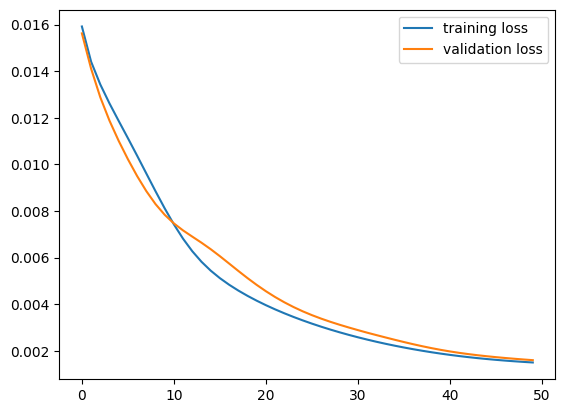

In [180]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [183]:
model2 = Sequential([
    LSTM(50, activation='tanh', return_sequences =True),
    LSTM(25, activation='tanh', return_sequences =True),
    Dense(1, activation='relu'),
])


In [184]:
model2.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics=['mse'])

In [187]:
history1 = model2.fit(xy_train, epochs=40, validation_data=xy_val)

Epoch 1/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 3/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 4/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 5/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 6/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 7/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 8/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 9/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.014

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [197]:
predict2=model2.predict(features)

139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [198]:
print('mean_absolute_error: ', mean_absolute_error(values, predict2))
print('mean_squared_error: ', mean_squared_error(values, predict2))
print('mean_absolute_error: ', np.sqrt(mean_absolute_error(values, predict2)))
print('mean_absolute_percentage_error: ', mean_absolute_percentage_error(values, predict2))

ValueError: Found array with dim 3. None expected <= 2.

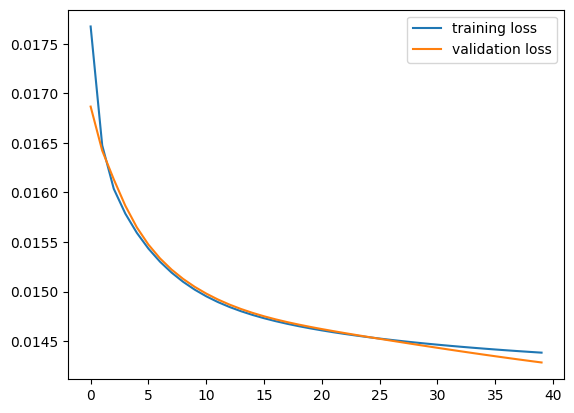

In [199]:
plt.plot(history1.history['loss'], label='training loss')
plt.plot(history1.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:
question1: i handled missing values and i did label encoding the scaling it helped me a lot with model accuracy

question2: as you asked to add 3 column for week, month and year so i added it then added the difference which helo me to uderestand the data more then added a column represent the traffic earlier using shift method actually i enjoyed it but to be honest you guys write that i should build all of there, i hope i can build it by myself witout telling

question3: Actually i literally have 5min left i just imlemented it then try adding and deleting layers until i reach this model u can see it up there

question4: number of epochs actually i was about to add 100 but i dont have time to wait for running so i see 40 and 50 givs a good model it is not bad and the adam optimizer cause it is appropriate for almost verything

question5:

question6: i didnt do tuning

question7: i was having overfitting and i handle it by trduce the window size into 24 and it working good also if i have moe time i will do better than that

question8:i will serach more about new algorithms and will do more feature engineering and i will enhance model by changing num of neurons and layers as well